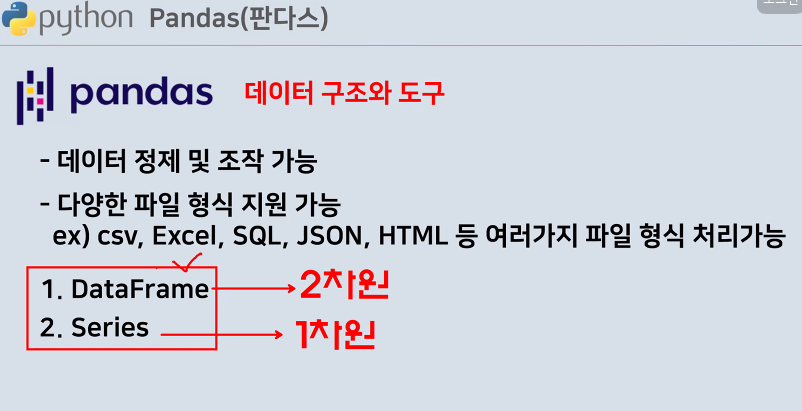

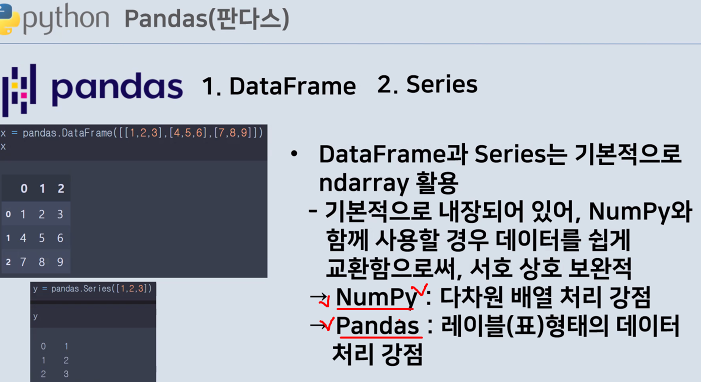

## 1. pandas
- pannel data의 약자
- 1. 다양한 파일 형식 지원 가능 → csv, excel, SQL, JSON 등등
- 2. 데이터 정제 및 조작 특화된 라이브러리
- 3. DataFram과 Series 는 기본적으로 np.array(ndarray)구조
    - numpy 라이브러리 호환

### 1.1 pandas에서 제공하는 데이터 구조
- Series : 1차원 배열 형태의 데이터 구조
    - index + value
- DataFrame : 2차원 배열 형태의 데이터 구조
    - Series들의 모음
    - column(열) + row(행) 구조
    - 서로 다른 자료형을 저장하여 활용할 수 있다.

In [1]:
import numpy as np
import pandas as pd

###  1 . Series 다루기
#### 1.1 Series 생성

In [2]:
# Series 생성
pop = pd.Series([9668465,3391946,2942828,1450062])
print(pop, end = "\n\n")

# index 명 지어주기
# pd.Series([시퀀스 자료구조], index = ['인덱스명1', '인덱스명2'...])
# population 을 줄여서 pop으로 별명 지어줬음..
pop = pd.Series([9668465,3391946,2942828,1450062], index = ['서울','부산','인천','광주'])
print(pop)

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [3]:
# Series 값 확인
print(pop.values, end='\n\n')
print(pop.array)

[9668465 3391946 2942828 1450062]

<PandasArray>
[9668465, 3391946, 2942828, 1450062]
Length: 4, dtype: int64


In [4]:
# Series  index 확인
pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [7]:
# Series 데이터 타입 확인
print(pop.dtype) # 요소들의 타입 확인
print()
print(type(pop)) # Series 타입 확인

int64

<class 'pandas.core.series.Series'>


In [9]:
# Series 에 이름 지정
# Series 에 큰 타이틀 이름 지정
pop.name = '인구'

# Series 에 index 이름 지정
pop.index.name= '지역'

pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [10]:
# Series 연산
pop / 1000000

지역
서울    9.668465
부산    3.391946
인천    2.942828
광주    1.450062
Name: 인구, dtype: float64

### 1.2 Series 인덱싱, 슬라이싱
- 인덱싱 : 1개의 요소를 가리키는 것
- 슬라이싱 :  여러개의 요소를 잘라내는 것

In [11]:
pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [20]:
print(pop[1]) # 정수 인덱싱
print(pop['부산']) # index 별명 인덱싱
print()
print(pop[ [0,3,1] ]) # 다중 인덱싱(정수)
print()
print(pop[ ['서울', '광주', '부산']]) # 다중 인덱싱 (index 별명)

3391946
3391946

지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64

지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64


### 1.3 'iloc' 와 'loc' 속성
- iloc : (Integer LOCation) 정수 위치 → '행번호'를 가지고 값을 인덱싱 하는 방법
- loc : (LOCation) 위치 → 'index 별명'을 가지고 값을 인덱싱 하는 방법

In [17]:
print(pop.iloc[0]) # iloc 인덱싱
print(pop.iloc[0:2]) # iloc 슬라이싱 # 끝값은 포함X

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


In [19]:
print(pop.loc['서울']) # iloc 인덱싱
print(pop.loc['서울':'부산']) # iloc 슬라이싱 (번호가 아니여서 ~ 끝값 포함)

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


### 1.4 Series Boolean 인덱싱
- 특정 조건을 만족하는 값들의 인덱싱
- Series[boolean mask]

## Series Boolean 인덱싱, 연산 실습!
- average monthly wage : 월 평균임금
- average daily wage : 일 평균임금

In [26]:
# data1 과  data2 는 각각 다른 회사의 급여
# data1, data2 는 딕셔너리 자료형임
data = {'IT기획자':8644000, '데이터분석가':7158000,
       '응용SW개발자':6426000, 'IT품질관리자':8294000}

# 딕셔너리 자료형을 Series로 변환
pd.Series(data)
sw_M_wage = pd.Series(data)
sw_M_wage
# sw_Month_wage

IT기획자      8644000
데이터분석가     7158000
응용SW개발자    6426000
IT품질관리자    8294000
dtype: int64

In [27]:
data2 = {'IT기획자':9543000, '데이터분석가':11226000,
       '시스템SW개발자':5100000, 'IT마케터':7801000}

# 딕셔너리 자료형을 Series로 변환
sw_M_wage2 = pd.Series(data2)
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [29]:
# 일 평균임금 계산
# 실제로는 3개월 간의 총 임금을 그 기간의 총 일수로 나눠서 산정
# 여기에서는 대충 일한 일 수로만 계산해보자(23일)

sw_D_wage = (sw_M_wage / 23).astype(int)
sw_D_wage #Day

IT기획자      375826
데이터분석가     311217
응용SW개발자    279391
IT품질관리자    360608
dtype: int32

In [31]:
# 두 회사의 차이를 비교하기 위해 연산 실행
# Series 끼리의 연산 (가능하나, inner join 으로만 나오게되고, 같지않은 값들은 Nan)
# NaN : 결측치 - 비어있는 값 ( 데이터 타입 - 없음)


wage_minus = sw_M_wage2 - sw_M_wage
wage_minus

IT기획자        899000.0
IT마케터             NaN
IT품질관리자           NaN
데이터분석가      4068000.0
시스템SW개발자          NaN
응용SW개발자           NaN
dtype: float64

In [32]:
# NaN을 날려버리기
wage_minus.notnull() # True, False --> mask

IT기획자        True
IT마케터       False
IT품질관리자     False
데이터분석가       True
시스템SW개발자    False
응용SW개발자     False
dtype: bool

In [34]:
# NaN을 날려버리기 
# 비어 있지 않은 데이터만 보는 경우
# notnull()
wage_minus[wage_minus.notnull()].astype(int)

IT기획자      899000
데이터분석가    4068000
dtype: int32

In [35]:
# 비어있는 데이터만 보는 경우
# isnull()
wage_minus[wage_minus.isnull()]

IT마케터      NaN
IT품질관리자    NaN
시스템SW개발자   NaN
응용SW개발자    NaN
dtype: float64

### 1.5 Series 데이터 추가, 수정,삭제

In [36]:
# 수정
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [38]:
sw_M_wage2['IT기획자'] = 9742000
sw_M_wage2

IT기획자        9742000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [62]:
# 주소값 공유
sw_M_wage2 += 100000
sw = sw_M_wage2
sw
#sw 와 sw_M_wage2가 동시에 바뀜

IT기획자       11242000
데이터분석가      12726000
시스템SW개발자     6600000
IT마케터        9301000
IT컨설턴트      10405000
dtype: int64

In [68]:
# .copy() 함수 사용하여 주소값 공유를 방지
sw.copy()

IT기획자       11442000
데이터분석가      12926000
시스템SW개발자     6800000
IT마케터        9501000
IT컨설턴트      10605000
dtype: int64

In [67]:
sw_M_wage2 += 100000
sw_M_wage2

IT기획자       11442000
데이터분석가      12926000
시스템SW개발자     6800000
IT마케터        9501000
IT컨설턴트      10605000
dtype: int64

In [56]:
# 추가
sw_M_wage2['IT컨설턴트'] = 9805000
sw_M_wage2

IT기획자       10642000
데이터분석가      12126000
시스템SW개발자     6000000
IT마케터        8701000
IT컨설턴트       9805000
dtype: int64

In [69]:
# 삭제
del sw_M_wage2['시스템SW개발자']
sw_M_wage2

IT기획자     11442000
데이터분석가    12926000
IT마케터      9501000
IT컨설턴트    10605000
dtype: int64

## 2. DateFrame
- 2차원 데이터에서 사용되는 자료구조
- 엑셀, Csv, DB, API 등 을 불러오되, 다시 재구성해야 함

In [70]:
# 첫번째 방법 : 딕셔너리를 통한 Column 단위로 생성

data = {'ITPM':[463,9543,57],
        '업무분석가':[544,11226,68],
       'IT아키텍트':[518,10672,64],
       'UIUX개발자':[291,6003,36]}
data

{'ITPM': [463, 9543, 57],
 '업무분석가': [544, 11226, 68],
 'IT아키텍트': [518, 10672, 64],
 'UIUX개발자': [291, 6003, 36]}

In [72]:
# DataFrame 화
df = pd.DataFrame(data) # 주의 ) DataFrame 대소문자 주의!!
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [73]:
# DataFrame 인덱스 별명 수정
df.index = ['일평균임금','월평균임금','시간평균임금']
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [74]:
#혹은 DataFrame화 + 인덱스 별명 수정 한번에
df = pd.DataFrame(data, index = ['일평균임금','월평균임금','시간평균임금'])
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [80]:
#두번째 방법 : row 단위로 list 활용
data2 = [[463,9543,57],
         [544,11226,68],
         [518,10672,64],
         [291,6003,36]]

col_name = ['일평균임금','월평균임금','시간평균임금']
row_name = ['ITPM','업무분석가','IT아키텍트','UIUX개발자']
df = pd.DataFrame(data2, index=row_name, columns=col_name)
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36


In [86]:
# index와 columns 전치 ( 위치 바꾸기)
# 위치 바꾸다 -> Transpose 의 약자 -> T
df.T
df = df.T
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [90]:
df.values

array([[  463,   544,   518,   291],
       [ 9543, 11226, 10672,  6003],
       [   57,    68,    64,    36]], dtype=int64)

In [88]:
df.index

Index(['일평균임금', '월평균임금', '시간평균임금'], dtype='object')

In [89]:
df.columns

Index(['ITPM', '업무분석가', 'IT아키텍트', 'UIUX개발자'], dtype='object')

## 2.1 DataFrame 인덱싱, 슬라이싱
- DataFrame은 "Series의 모임"이라고 생각하면 편함
- DataFrame 인덱싱 : 하나의 Series를 가져옴
- DataFrame 슬라이싱 : 여러 개의 원하는 부분을 가져옴

#### 2.1.1 열접근(컬럼 선택)
- DataFrame명['컬럼명']

In [87]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [97]:
# Series → 1차원 → []
df['ITPM']

일평균임금      463
월평균임금     9543
시간평균임금      57
Name: ITPM, dtype: int64

In [98]:
# DataFrame → 2차원 → [[]]
df[ ['ITPM']]

,ITPM
일평균임금,463
월평균임금,9543
시간평균임금,57


In [101]:
df[ ['ITPM' ,'업무분석가']]

,ITPM,업무분석가
일평균임금,463,544
월평균임금,9543,11226
시간평균임금,57,68


In [102]:
# DataFrame 는 기본적으로 '열' 접근
df[ ['일평균임금']] # 행 -> 오류

KeyError: "None of [Index(['일평균임금'], dtype='object')] are in the [columns]"

In [100]:
# DataFrame 추가
df['정보보안전문가'] = [362,7426,45]
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [103]:
# 행 슬라이싱
df[0:2] # 갑자기 행으로 인덱싱이 됨 → 헷갈림
# DataFrame은 컬럼은 인덱싱으로 접근하고,
#                   row는 슬라이싱으로 접근이 가능하나?
# 그건 아니다! -> 인덱서 활용

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426


## 2.2 DataFrame 슬라이싱 → 인덱서(indexer) 활용
- 인덱서란?
    - DataFrame 객체에 대해서 '함수'가 아닌 '속성'으로써, 행과 열을 한번에 인덱싱/슬라이싱 할 수 있는 기능
    - "속성"이기때문에 → [] 대괄호 사용

<br><br>
#### 인덱서
<br>
    -loc[] 인덱서
        -"행 이름" 과 "열 이름"을 가지고 값을 인덱싱/슬라이싱 하는 방법
<br><br>
    -iloc[] 인덱서
        -"행 번호'와 "열 번호"를 가지고 값을 인덱싱/슬라이싱 하는 방법

In [104]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [105]:
df.loc['시간평균임금'] #loc -> 행

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

In [107]:
display(df.loc['시간평균임금'])
#display -> print 함수 처럼 한셀에 여러 개를 띄울수 있음
display(df.iloc[2])

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

- loc 인덱서
    - DataFrame명.loc['행 이름(인덱스 명)' , '열 이름(컬럼 명)' ]
    - "컬럼명" 생략가능
    - "컬럼명" 생략 시 해당 행의 모든 열을 출력!
- iloc 인덱서
    - DataFrame명.iloc[" 행 번호" , "열 번호"]
    - "열 번호" 생략 가능
    - "열 번호" 생략 시 해당 행의 모든 열을 출력!

In [111]:
display(df)
display(df.loc['시간평균임금','ITPM'])
display(df.iloc[2,0])

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


57

57

In [112]:
display(df)
display(df.loc['시간평균임금'])
display(df.iloc[2])

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64